# Задание 3


In [130]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

Будем работать с [данными](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) по больным диабетом. Разбейте выборку на обучающую и тестовую в соотношении 7:3.

In [195]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [196]:
#ваш код здесь
feature_names = data.feature_names
X = data.data
y = data.target
N, d = X.shape
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=23)

In [197]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### 1. Зависимость коэффициентов регрессии от параметра регуляризации. 
Рассмотрим Ridge регрессию с различным параметром регуляризации $\alpha \in [10^{-3},10^{3}]$. Постройте зависимости каждого из коэффициентов регрессии от параметра $\alpha$. 

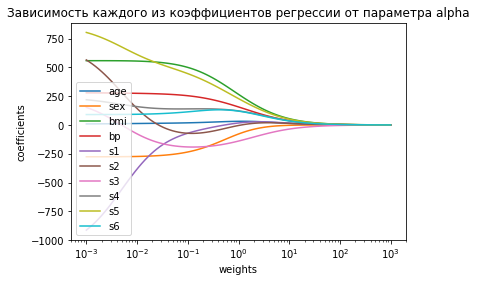

In [198]:
#ваш код здесь
alpha_arr = np.logspace(-3,3,100)
params = []
for alpha in alpha_arr:
    ridge_model = Ridge(alpha= alpha)
    ridge_model.fit(X_train,y_train)
    params.append(ridge_model.coef_)
np_params = np.array(params)
for i in range(np_params.shape[1]):
    plt.plot(alpha_arr, np_params[:,i])
    plt.legend(feature_names)
    plt.xlabel("weights")
    plt.ylabel("coefficients")
    plt.xscale('log')
    plt.title("Зависимость каждого из коэффициентов регрессии от параметра alpha")

#### 2. Зависимость числа нулевых коэффициентов от параметра регуляризации. 
Рассмотрим Lasso регрессию с различным параметром регуляризации $\alpha \in [10^{-3},1]$. Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации $\alpha$. 

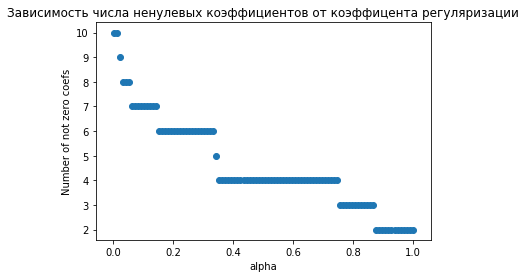

In [199]:
alpha_arr = np.linspace(1e-3,1,100)
num_not_zero_coefs = []
for alpha in alpha_arr:
    lasso_model = Lasso(alpha= alpha)
    lasso_model.fit(X_train,y_train)
    num_not_zero_coefs.append(np.sum(np.abs(lasso_model.coef_) > 1e-3))
plt.scatter(alpha_arr, num_not_zero_coefs)
plt.xlabel("alpha")
plt.ylabel("Number of not zero coefs")
plt.title("Зависимость числа ненулевых коэффициентов от коэффицента регуляризации");

### Ridge регрессия. 
Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации. Перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$ и используйте кросс-валидацию по 5 фолдам (выборку разбивайте случайным образом). Используйте RidgeCV и KFold из sklearn. 
#### 3. Чему равен оптимальный коэффициент регуляризации? 

In [212]:
alpha_arr = np.logspace(-3,3,100)
sp=KFold(5,shuffle =True)
ridgeCV_model = RidgeCV(alphas = alpha_arr,cv=sp)
ridgeCV_model.fit(X, y)

alpha_KFold = ridgeCV_model.alpha_
alpha_KFold

C:\Users\dales\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.07564633275546291

In [201]:
ridgeCV_model = RidgeCV(alphas = alpha_arr,cv=5)
ridgeCV_model.fit(X_train, y_train)

alpha_CV = ridgeCV_model.alpha_
alpha_CV

C:\Users\dales\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.04328761281083059

#### 4. Чему равна среднеквадратичная и средняя абсолютная ошибки на тестовой выборке?

In [202]:
#ваш код здесь
from sklearn.metrics import mean_squared_error
predict = ridgeCV_model.predict(X_test)
m_s_e = mse(y_test, predict)
m_a_e = mae(y_test, predict)
print("MSE = ", m_s_e,"\nMAE = ", m_a_e)

MSE =  2737.146499380738 
MAE =  40.59610763185972


#### 5. Распределение ошибок на обучающей выборке. 
Посчитайте ошибки на каждом обучающем объекте: 
$$\delta^{j}_{train}=y_{pred}^{j}-y_{train}^{j},$$
и постройте распределение ошибок. Какой статистике подчиняется полученное распределение?

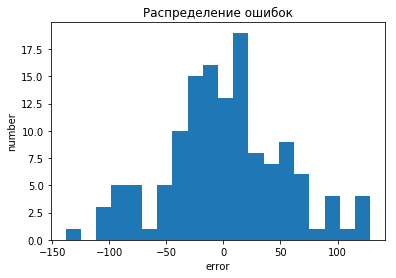

In [215]:
#ваш код здесь
error = predict - y_test
plt.hist(error,bins = 20)
plt.xlabel("error")
plt.ylabel("number")
plt.title("Распределение ошибок");
##Похоже на нормальное распределение

### Lasso регрессия. 
Подберите на обучающей выборке для Lasso-регрессии коэффициент регуляризации,используя кросс-валидацию как в предыдущей модели. 
#### 6. Как изменилась среднеквадратичная и средняя абсолютная ошибка на тестовой выборке по сравнению с Ridge регрессией? 

In [204]:
#ваш код здесь
lassoCV_model = LassoCV(alphas = alpha_arr, cv = 5)
lassoCV_model.fit(X_train, y_train)
predict_lasso = lassoCV_model.predict(X_test)
m_s_e_l = mse(y_test, predict_lasso)
m_a_e_l = mae(y_test, predict_lasso)
print("MSE = ", m_s_e_l,"\nMAE = ", m_a_e_l)
print("MSE difference = ", m_s_e_l - m_s_e,"\nMAE difference = ", m_a_e_l - m_a_e)

MSE =  2744.613936762387 
MAE =  40.584833493174806
MSE difference =  7.467437381648779 
MAE difference =  -0.011274138684910895


#### 7. Постройте зависимость среднеквадратичной ошибки от значения параметра регуляризации. 

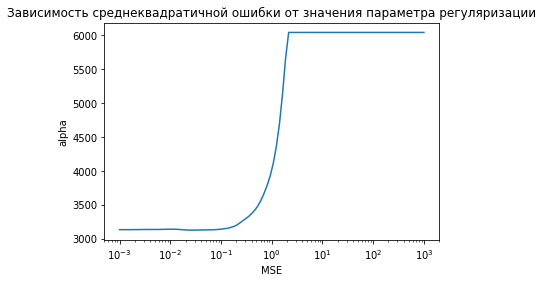

In [217]:
plt.plot(lassoCV_model.alphas_, np.mean(lassoCV_model.mse_path_, axis = 1))
plt.xscale('log')
plt.xlabel("MSE")
plt.ylabel("alpha")
plt.title("Зависимость среднеквадратичной ошибки от значения параметра регуляризации");